# Previsão de Lucro - Regressão Linear Múltipla

## Introdução

Nosso objetivo é construir um modelo de Machine Learning que seja capaz de fazer previsões sobre o lucro de empresas nos Estados Unidos com base em seus gastos com R&D, administração, marketing, e a localização da empresa (estado). Para tal, decidimos resolvê-lo utilizando a Regressão Linear Múltipla.

## Definindo o Dataset

Usaremos o arquivo '1000 Companies' retirado do Kaggle, plataforma que disponibiliza dados reais públicos para a realização de estudos. Existem 1000 observações nos dados para 5 variáveis, sendo 4 numéricas e uma categórica. 

Fonte de dados: https://www.kaggle.com/datasets/pythonafroz/companies-profit/data

Descrição dos campos:

    1) R&D Spend: Gastos com Research and Development.
    2) Administration: Custos administrativos.
    3) Marketing Spend: Gastos com Marketing.
    4) State: Estado onde a empresa está localizada. Dividido entre New York, California e Florida.
    5) Profit: Lucro da empresa.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
# Importando e visualizando a base de dados
df = pd.read_csv('1000_Companies.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,New York,192261.83000
1,162597.70,151377.590,443898.5300,California,191792.06000
2,153441.51,101145.550,407934.5400,Florida,191050.39000
3,144372.41,118671.850,383199.6200,New York,182901.99000
4,142107.34,91391.770,366168.4200,Florida,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000


In [3]:
# Checando tipo dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [4]:
# Checando estados únicos dentro da variável "State"
df["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [5]:
# Transformando a variável "State" de object para integer usando LabelEncoder
# California = 0, Florida = 1, New York = 2
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

labelencoder = LabelEncoder()
df["State"] = labelencoder.fit_transform(df["State"])
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,2,192261.83000
1,162597.70,151377.590,443898.5300,0,191792.06000
2,153441.51,101145.550,407934.5400,1,191050.39000
3,144372.41,118671.850,383199.6200,2,182901.99000
4,142107.34,91391.770,366168.4200,1,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,0,95279.96251
996,134970.00,130390.080,329204.0228,0,164336.60550
997,100275.47,241926.310,227142.8200,0,413956.48000
998,128456.23,321652.140,281692.3200,0,333962.19000


In [6]:
# Checando se existem valores nulos
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
# Checando dados estatísticos
df.describe()

,R&D Spend,Administration,Marketing Spend,State,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,0.990000,119546.164656
std,46537.567891,12613.927535,91578.393542,0.823759,42888.633848
min,0.000000,51283.140000,0.000000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,0.000000,85943.198543
50%,79936.000000,122421.612150,224517.887350,1.000000,117641.466300
75%,124565.500000,129139.118000,308189.808525,2.000000,155577.107425
max,165349.200000,321652.140000,471784.100000,2.000000,476485.430000


<Axes: >

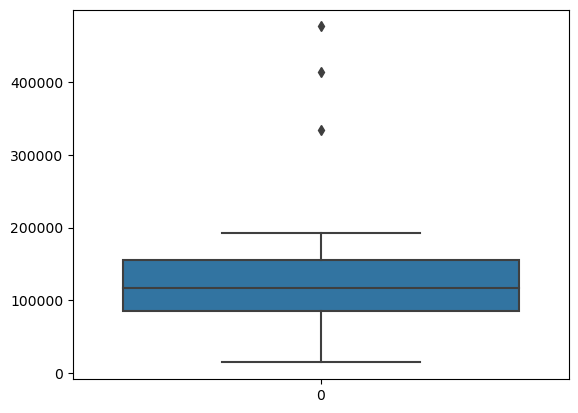

In [8]:
# Criando um boxplot para verificar a presença de outliers
sns.boxplot(df['Profit'])

In [9]:
# Visualizando outliers
# Inicialmente não iremos retirá-los, para observarmos como o modelo se comporta com e sem eles
df.loc[df['Profit']>300000]

,R&D Spend,Administration,Marketing Spend,State,Profit
997,100275.47,241926.31,227142.82,0,413956.48
998,128456.23,321652.14,281692.32,0,333962.19
999,161181.72,270939.86,295442.17,2,476485.43


In [10]:
# Retirando outliers após rodar o modelo com eles (mais detalhes na Conclusão)
df.drop(df.loc[df['Profit']>300000].index, inplace =True)
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.8000,471784.1000,2,192261.83000
1,162597.70,151377.5900,443898.5300,0,191792.06000
2,153441.51,101145.5500,407934.5400,1,191050.39000
3,144372.41,118671.8500,383199.6200,2,182901.99000
4,142107.34,91391.7700,366168.4200,1,166187.94000
...,...,...,...,...,...
992,105127.00,125982.7298,271621.8728,1,138841.98810
993,46798.00,117368.4374,159075.9080,0,89012.02672
994,97209.00,124813.3635,256344.0701,2,132077.70900
995,54135.00,118451.9990,173232.6695,0,95279.96251


<Axes: >

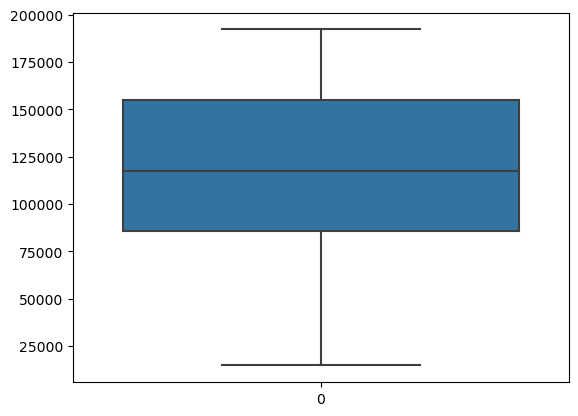

In [11]:
# Visualizando novamente o boxplot.
sns.boxplot(df['Profit'])

<Axes: >

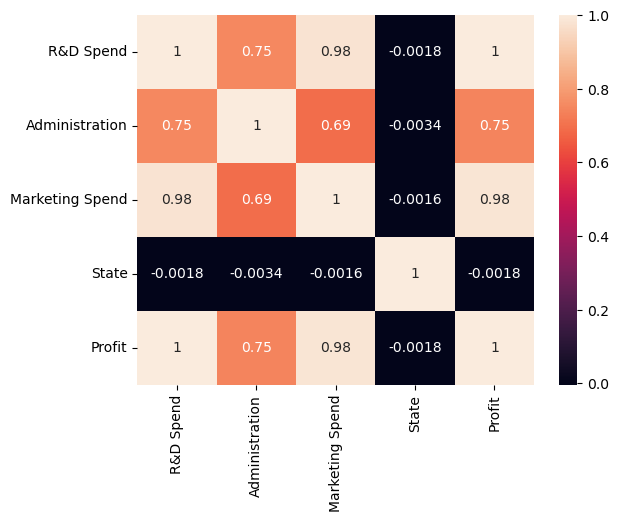

In [12]:
# Visualizando heatmap para já verificar correlação entre variáveis
sns.heatmap(df.corr(), annot=True)

In [13]:
# Separando X e y para montar o modelo
# Aqui dropei a coluna "State" pois sua correlação com o lucro é praticamente nula
X = df.iloc[:, :-2].values
y = df.iloc[:, -1].values

In [14]:
# Dividindo a base de dados entre Training set e Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
# Aplicando o modelo de Regressão Linear Múltipla ao Training Set
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [16]:
# Calculando os coeficientes da Regressão
print(lr.coef_)

[ 0.79640251 -0.02750884  0.03289163]


In [17]:
# Calculando o y-intercept da Regressão
print(lr.intercept_)

49695.49309460375


In [18]:
# Estimando valores para o y (treino)
y_pred = lr.predict(X_train)

In [19]:
# Calculando o R2_Score, o MSE e o MAE (treino)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print(r2_score(y_train, y_pred))
print(mean_squared_error(y_train, y_pred))
print(mean_absolute_error(y_train, y_pred))

0.9975072068853348
3927776.2933303267
389.6117889084932


In [20]:
# Estimando valores para o y (teste)
y_pred = lr.predict(X_test)

In [21]:
# Calculando o R2_Score, o MSE e o MAE (teste)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.997474812071672
4034551.4530884568
365.24182566783713


In [22]:
# Fazendo previsões com o modelo treinado
RD = 150000
ADM = 120000
MKT = 250000
Xp = np.array([[RD, ADM, MKT]])
print("Se meus gastos com R&D = US$ %01.f, ADM = US$ %01.f, e MKT = US$ %01.f" 
     "\no lucro previsto é de US$ %01.f." % (RD, ADM, MKT, lr.predict(Xp)))

Se meus gastos com R&D = US$ 150000, ADM = US$ 120000, e MKT = US$ 250000
o lucro previsto é de US$ 174078.


# Conclusão

1) Inicialmente, mantivemos os outliers na base e chegamos em um resultado de:
    - Training set: R2 = 0,9584, MSE = 72.712.257, MAE = 1.605
    - Test set: R2 = 0,9117, MSE = 191.134.724, MAE = 2.273
2) Então os retiramos e verificamos as seguintes alterações:
    - Training set: R2 = 0,9975, MSE = 3.927.776, MAE = 389
    - Test set: R2 = 0,9975, MSE = 4.034.551, MAE = 365 
3) É importante mencionar que os coeficientes da regressão também foram drasticamente alterados com a retirada dos outliers, especialmente da variável "Administration Spending", que saiu de 0,84 para -0,03. Isso ocorreu pois os outliers têm valores altíssimos para gastos com R&D e lucro, porém ficam na média nos custos administrativos e de marketing, o que cria uma falsa correlação entre custos administrativos e lucro.
4) Com isso, podemos concluir que a variável "R&D Spending" é responsável pela maior parte da mudança no lucro, "Marketing Spending", apesar de ter menor impacto, também o altera de forma positiva, enquanto "Administration Spending" tem um impacto próximo aos de marketing, porém de forma negativa. As 3 variáveis juntas explicam aproximadamente 99,75% da variabilidade no lucro da empresa.
5) Embora o modelo demonstre forte correlação entre as variáveis, o R2 score por si só não indica causalidade e não deve ser interpretado como tal, portanto é importante analisar o peso das variáveis não observadas e utilizar outros testes que, em conjunto com um profundo conhecimento da área estudada, possam complementar o modelo acima e concluir a existência de causalidade.
6) Por último, é importante abordar perguntas que não são respondidas pelos dados acima, como "Qual produto é vendido pela empresa?" e "Qual o período avaliado para calcular esses valores?", pois estes são dois pontos importantes que podem impactar o resultado final.
7) Complementando o ponto "6", faremos uma suposição que as empresas são todas do mesmo segmento, de forma que possamos tirar conclusões mais significativas. Primeiramente, podemos concluir que as relações observadas são tendências macroeconômicas que não dizem muito sobre a empresa em si, como a qualidade dos departamentos de marketing e research. Além disso, as 3 empresas outliers se destacam pelos gastos reduzidos em R&D e marketing e elevados em admministração, o que pode significar que são empresas mais antigas e consolidadas, enquanto as outras são empresas mais novas que precisam de gastos mais elevados nessas duas frentes para serem competitivas. Portanto, além das perguntas mencionadas, tentaríamos buscar também a idade de cada empresa, podendo assim definir melhor os outliers.